<a href="https://colab.research.google.com/github/Karthikamantharasalam/Projects/blob/main/heartdisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
!pip install colorama
import colorama
from colorama import Back
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

In [ ]:
Main_Dataset = pd.read_csv('/content/drive/MyDrive/pneumonia/heart (2).csv')
Main_Dataset = pd.DataFrame(Main_Dataset)
print(Main_Dataset.shape)


(303, 14)


In [ ]:
print(Main_Dataset.shape)
Main_Dataset.head(100).style.set_properties(**{'background-color': '#F6E7E8',
                           'color': 'black',
                           'border-color': 'black'})


(303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.300000,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500000,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400000,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800000,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600000,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.400000,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.300000,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.000000,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.500000,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.600000,2,0,2,1


In [ ]:
def describe(Main_Dataset):


    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    min_ = []
    max_ = []


    for item in Main_Dataset.columns:
        variables.append(item)
        dtypes.append(Main_Dataset[item].dtype)
        count.append(len(Main_Dataset[item]))
        unique.append(len(Main_Dataset[item].unique()))
        missing.append(Main_Dataset[item].isna().sum())

        if Main_Dataset[item].dtypes == 'float64' or Main_Dataset[item].dtypes == 'int64':
            min_.append(Main_Dataset[item].min())
            max_.append(Main_Dataset[item].max())
        else:
            min_.append('Str')
            max_.append('Str')


    output = pd.DataFrame({
        'variable': variables,
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing value': missing,
        'Min': min_,
        'Max': max_
    })

    return output

In [ ]:
Styles = [dict(selector = "caption",
               props = [("color", "white"),
                        ("text-align", "center"),
                       ('font-size', '15pt'),
                       ('background-color', '#E72B3B')])]

In [ ]:
import pandas as pd
import numpy as np

# Load dataset
Main_Dataset = pd.read_csv('/content/drive/MyDrive/pneumonia/heart (2).csv')

# Add noise to the dataset
def add_noise(df, noise_level=0.01, num_samples=100):
    """Create synthetic samples by adding noise to the dataset."""
    noisy_data = []

    # Create new samples
    for _ in range(num_samples):
        noise = np.random.normal(0, noise_level, size=df.shape[1])
        new_sample = df.mean() + noise
        noisy_data.append(new_sample)

    noisy_df = pd.DataFrame(noisy_data, columns=df.columns)
    return noisy_df

noisy_dataset = add_noise(Main_Dataset, num_samples=100)
print(noisy_dataset.head())


         age       sex        cp      trtbps        chol       fbs   restecg  \
0  54.368560  0.693020  0.968255  131.628387  246.278482  0.150771  0.507829   
1  54.364747  0.680535  0.971654  131.626995  246.274316  0.158948  0.535792   
2  54.359654  0.686790  0.968326  131.603056  246.262072  0.162521  0.529642   
3  54.374994  0.685954  0.962822  131.617699  246.273030  0.147012  0.524755   
4  54.378083  0.692304  0.965667  131.626075  246.265538  0.145752  0.523470   

     thalachh      exng   oldpeak       slp       caa     thall    output  
0  149.657636  0.327783  1.043155  1.410335  0.739421  2.335488  0.541704  
1  149.652709  0.326374  1.055217  1.395317  0.738252  2.308950  0.535772  
2  149.653571  0.330300  1.047252  1.397606  0.736508  2.307880  0.557150  
3  149.631302  0.331997  1.031147  1.390765  0.720358  2.298903  0.537067  
4  149.650995  0.321181  1.041244  1.380904  0.736546  2.305429  0.540572  


In [ ]:
desc_df = describe(Main_Dataset)
desc_df = desc_df.style.set_caption('Overview of the dataset').set_table_styles(Styles)
desc_df.set_properties(**{'background-color': '#F6E7E8',
                           'color': 'black',
                           'border-color': 'black'})

,variable,dtype,count,unique,missing value,Min,Max
0,age,int64,303,41,0,29.000000,77.000000
1,sex,int64,303,2,0,0.000000,1.000000
2,cp,int64,303,4,0,0.000000,3.000000
3,trtbps,int64,303,49,0,94.000000,200.000000
4,chol,int64,303,152,0,126.000000,564.000000
5,fbs,int64,303,2,0,0.000000,1.000000
6,restecg,int64,303,3,0,0.000000,2.000000
7,thalachh,int64,303,91,0,71.000000,202.000000
8,exng,int64,303,2,0,0.000000,1.000000
9,oldpeak,float64,303,40,0,0.000000,6.200000


Variable Explanation:
Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

caa: number of major vessels (0-4)

cp : Chest Pain type chest pain type Value 1: typical angina Value 2: atypical angina Value 3: non-anginal pain Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results Value 0: normal Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

target : 0= less chance of heart attack 1= more chance of heart attack



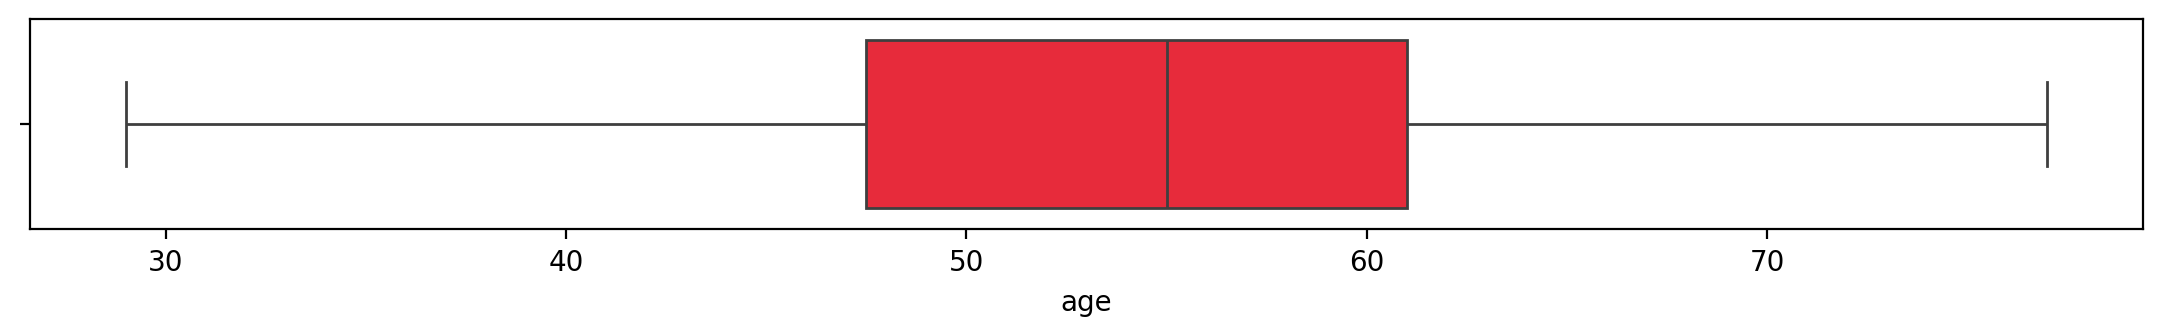

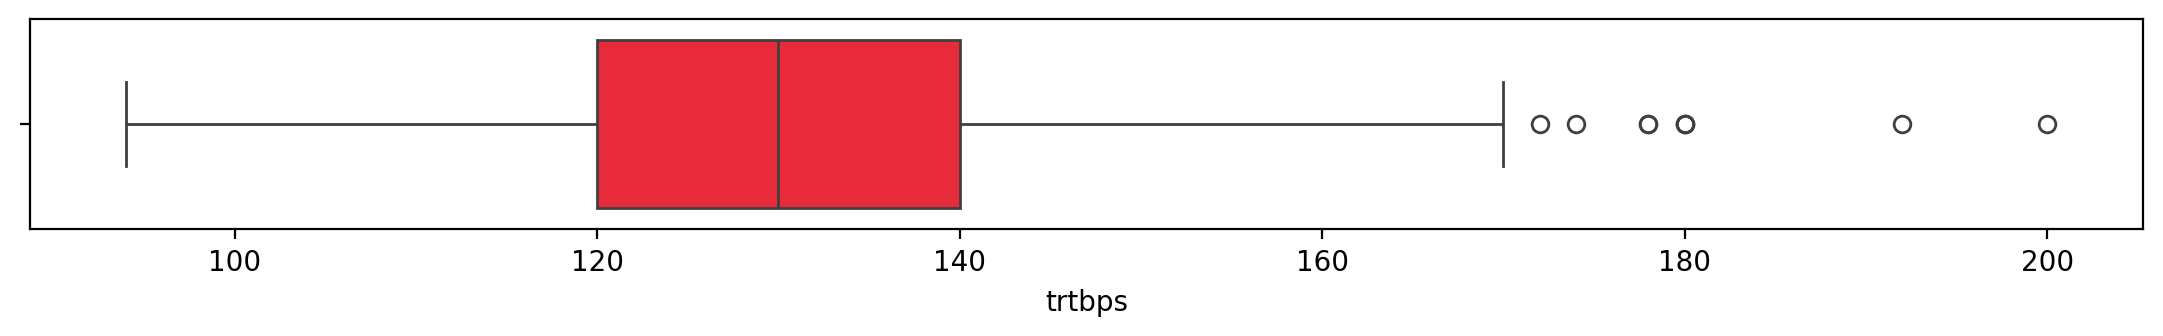

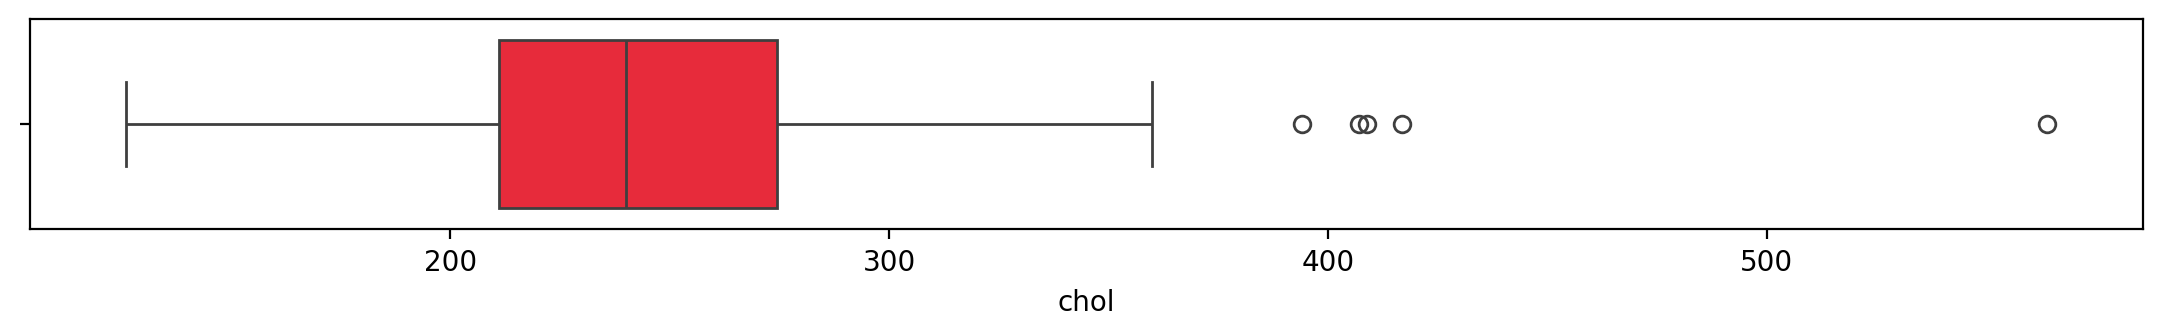

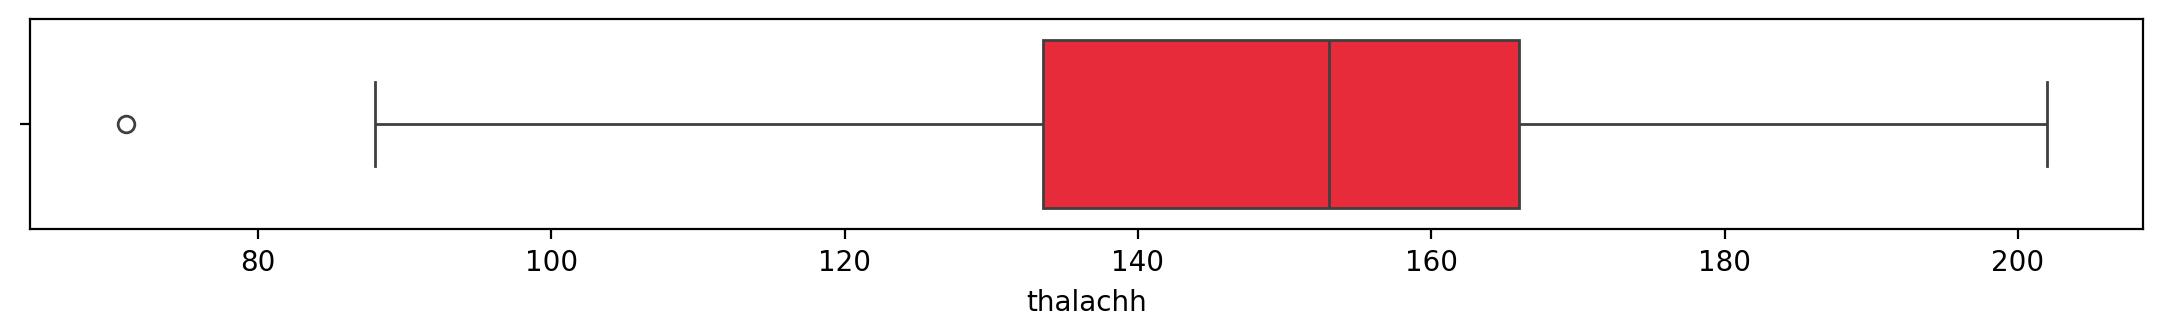

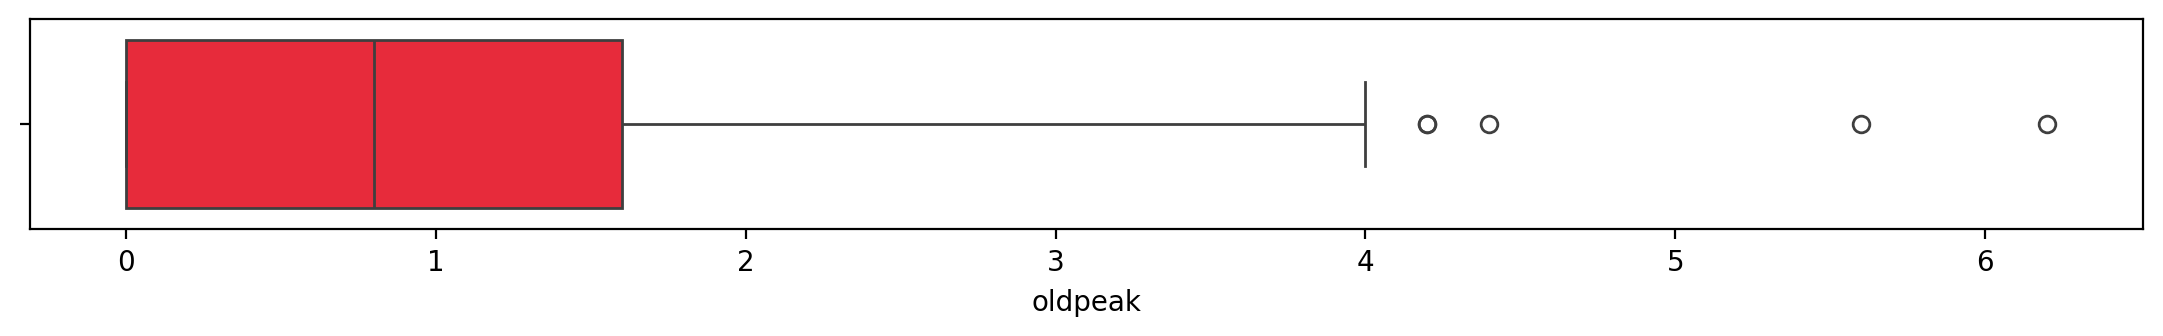

In [ ]:
Numerical = ['age', 'trtbps','chol','thalachh','oldpeak']
i = 0
while i < 5:
    fig = plt.figure(figsize = [30,3], dpi=200)
    plt.subplot(2,2,1)
    sns.boxplot(x = Numerical[i], data = Main_Dataset,
           boxprops = dict(facecolor = "#E72B3B"))
    i += 1
    plt.show()


In [ ]:
Chol_noise = Main_Dataset[Main_Dataset["chol"]>500].index
Chol_noise

Index([85], dtype='int64')

In [ ]:
Main_Dataset.drop(index=[85], inplace=True)
Main_Dataset.shape

(302, 14)

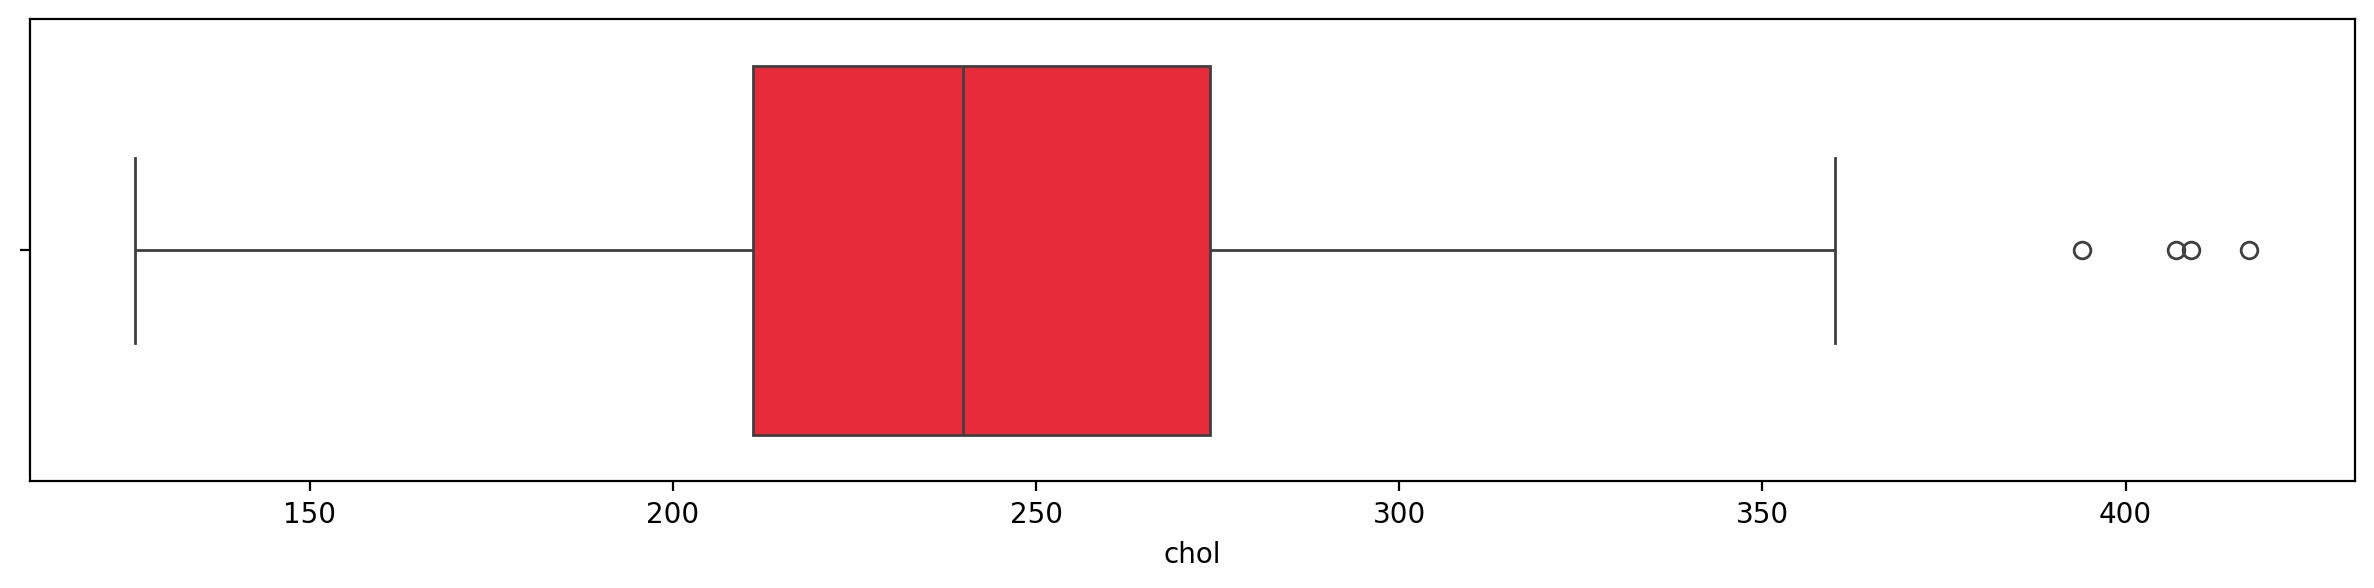

In [ ]:
fig = plt.figure(figsize = [15,3], dpi=200)
sns.boxplot(x = 'chol', data = Main_Dataset,
        boxprops = dict(facecolor = "#E72B3B"))

plt.show()

In [ ]:
Target_0_data = Main_Dataset[Main_Dataset["output"]==0]
Target_0_data = pd.DataFrame(Target_0_data)
Target_1_data = Main_Dataset[Main_Dataset["output"]==1]
Target_1_data = pd.DataFrame(Target_1_data)
print("The shape of data when target is '0': Not disease",Target_0_data.shape)
print("The shape of data when target is '1': Disease",Target_1_data.shape)

The shape of data when target is '0': Not disease (138, 14)
The shape of data when target is '1': Disease (164, 14)


In [ ]:
Target_0_data.sort_values(by=['age'], inplace=True)
Target_1_data.sort_values(by=['age'], inplace=True)

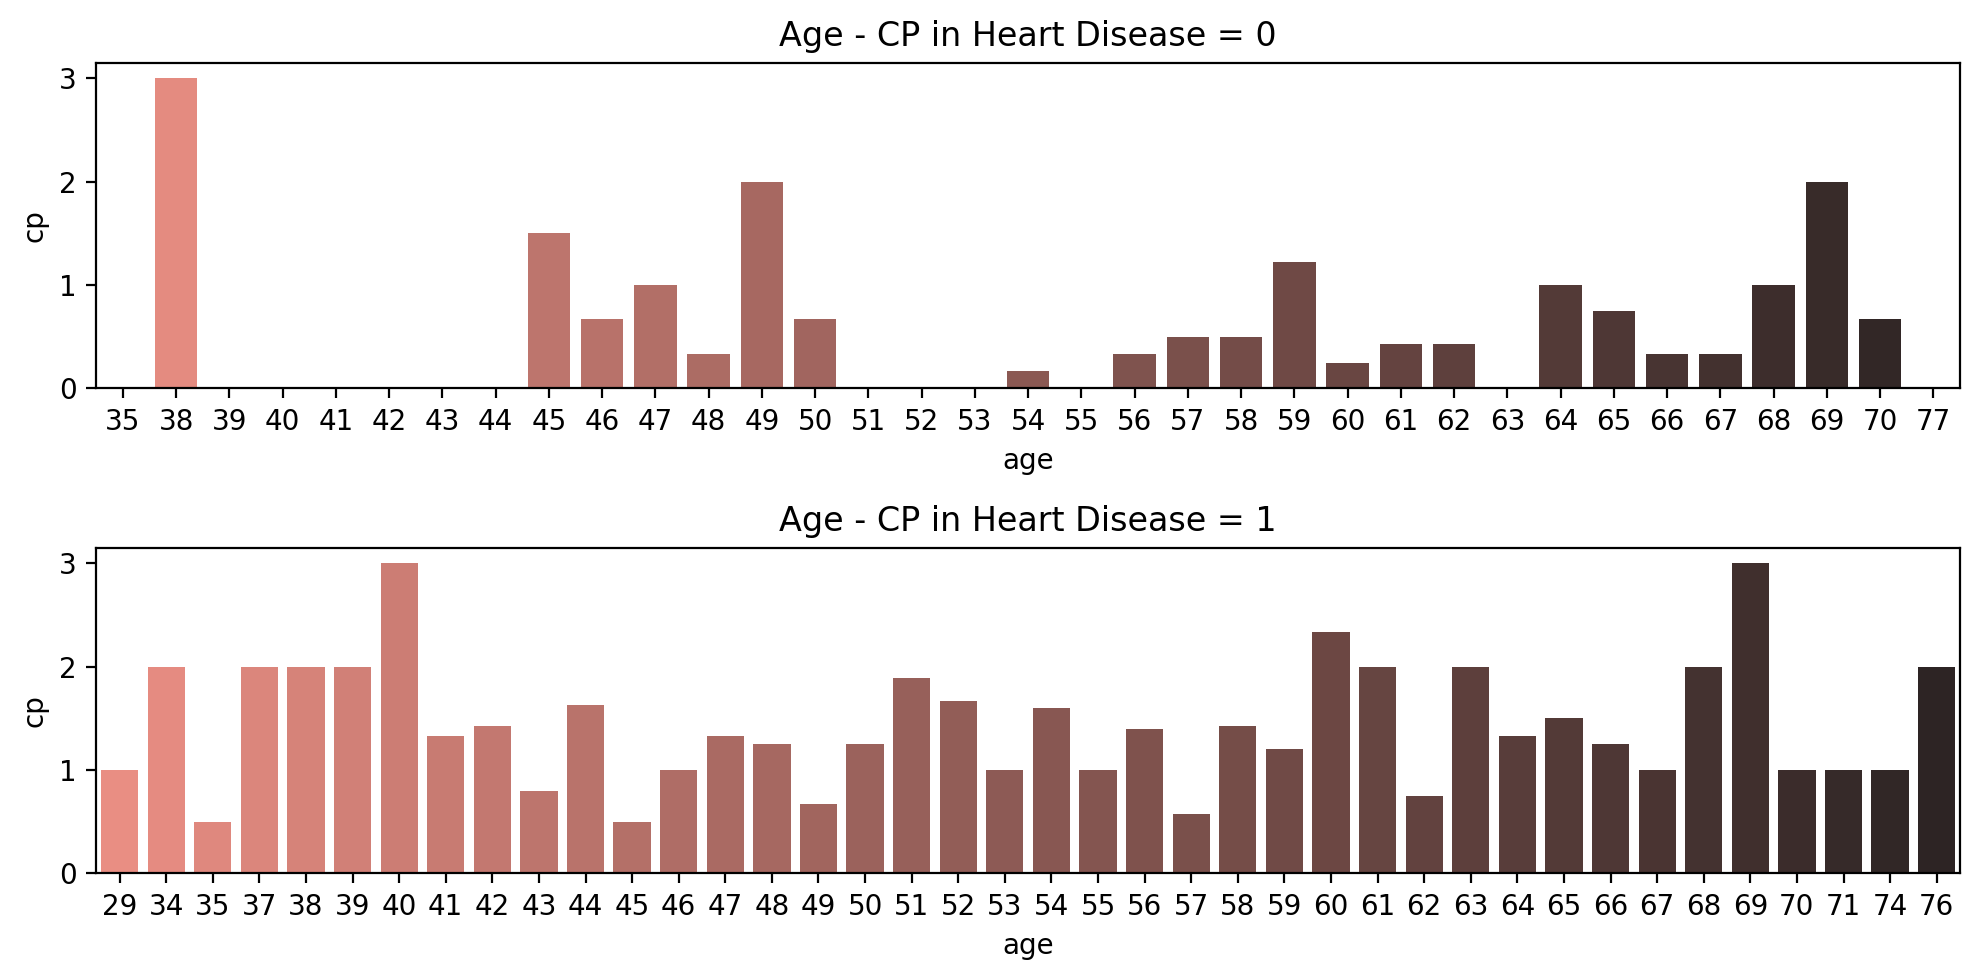

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5), dpi=200)
sns.barplot(x= Target_0_data['age'], y= Target_0_data['cp'], errorbar=None,
            palette="dark:salmon_r",ax= axes[0]).set(title='Age - CP in Heart Disease = 0')
sns.barplot(x= Target_1_data['age'], y= Target_1_data['cp'], errorbar=None,
            palette="dark:salmon_r",ax= axes[1]).set(title='Age - CP in Heart Disease = 1')


plt.tight_layout()

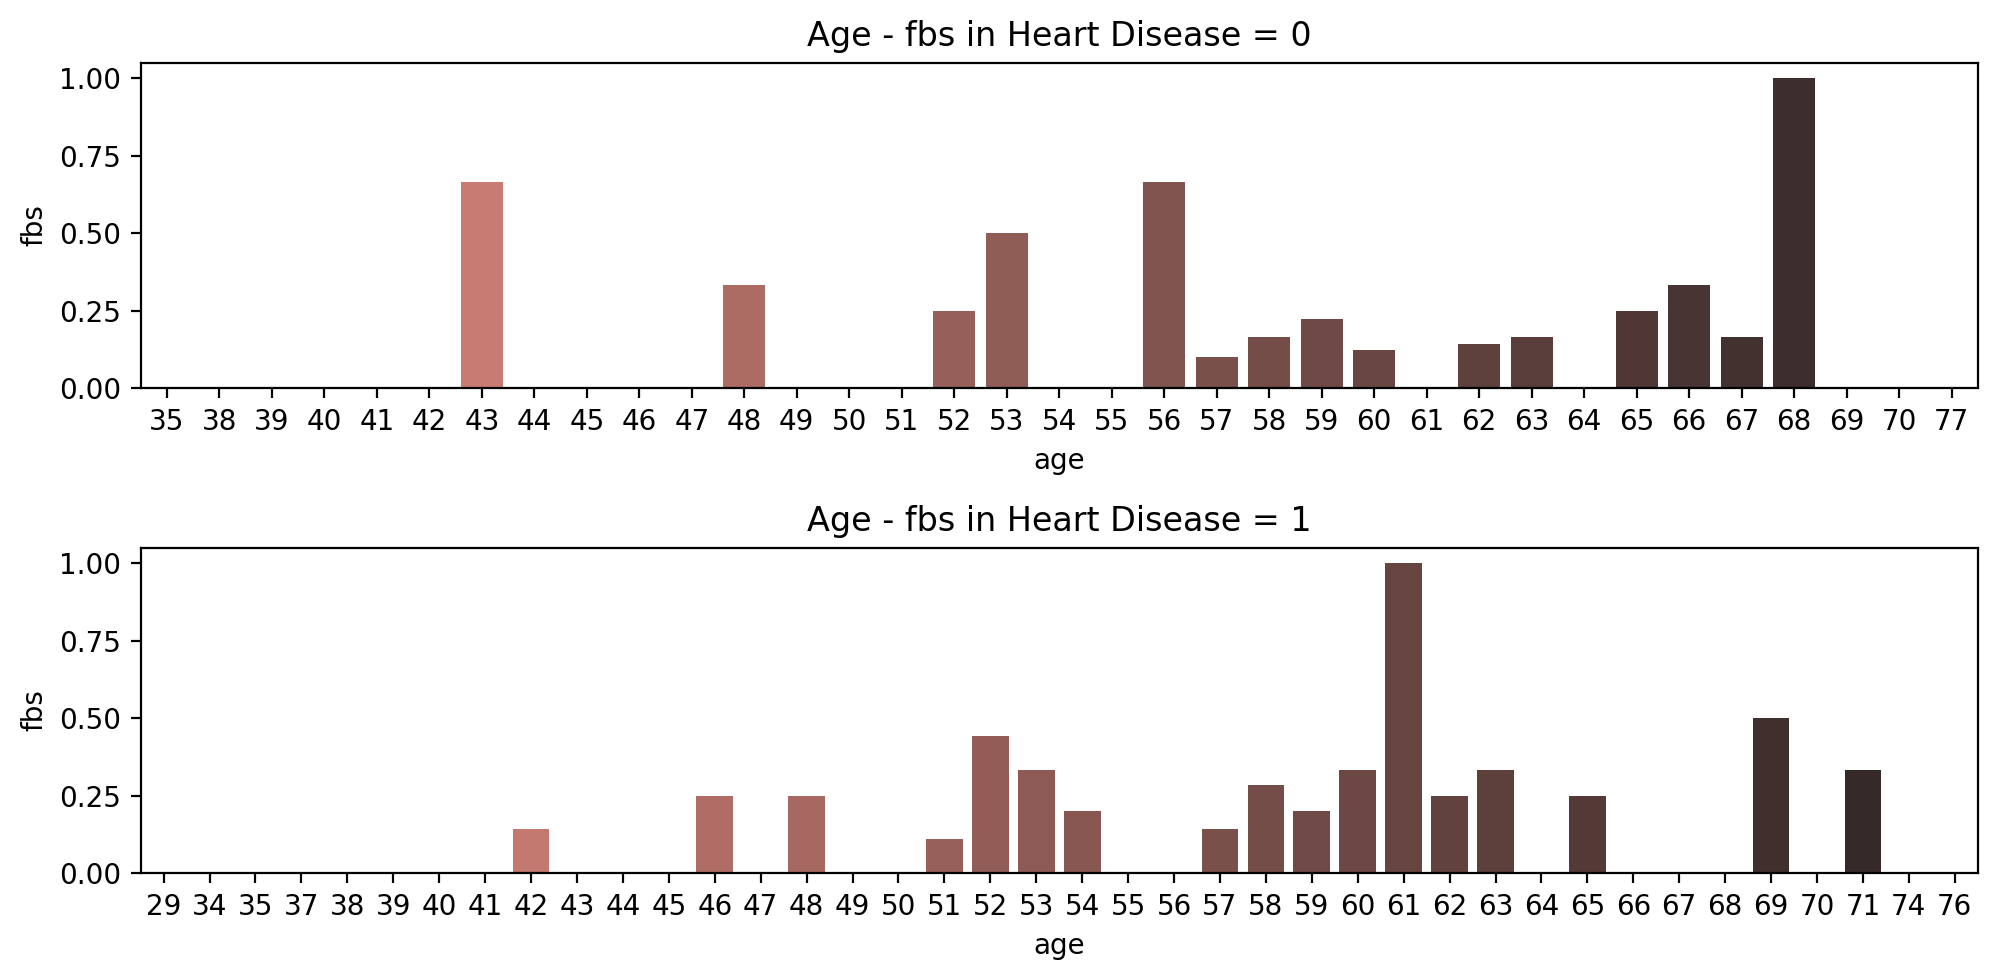

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5), dpi=200)
sns.barplot(x= Target_0_data['age'], y= Target_0_data['fbs'], errorbar=None,
            palette="dark:salmon_r",ax= axes[0]).set(title='Age - fbs in Heart Disease = 0')
sns.barplot(x= Target_1_data['age'], y= Target_1_data['fbs'], errorbar=None,
            palette="dark:salmon_r",ax= axes[1]).set(title='Age - fbs in Heart Disease = 1')


plt.tight_layout()

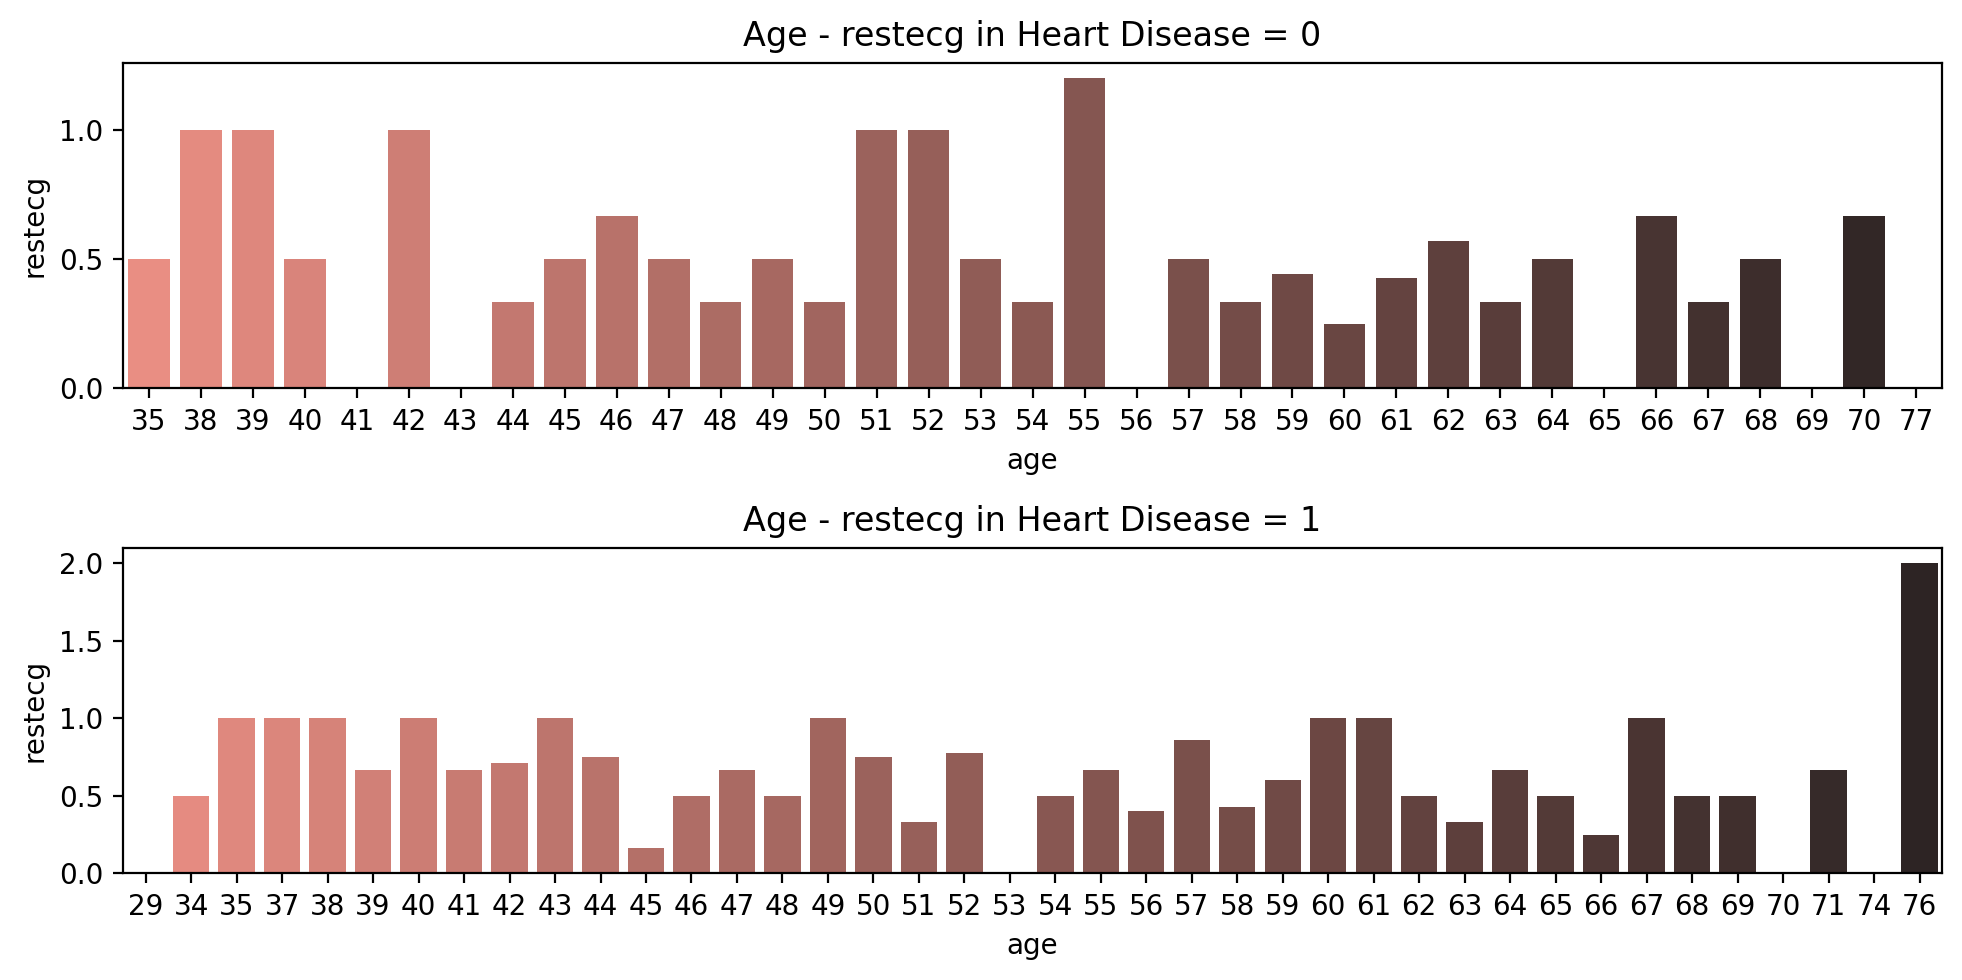

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5), dpi=200)
sns.barplot(x= Target_0_data['age'], y= Target_0_data['restecg'], errorbar=None,
            palette="dark:salmon_r",ax= axes[0]).set(title='Age - restecg in Heart Disease = 0')
sns.barplot(x= Target_1_data['age'], y= Target_1_data['restecg'], errorbar=None,
            palette="dark:salmon_r",ax= axes[1]).set(title='Age - restecg in Heart Disease = 1')


plt.tight_layout()


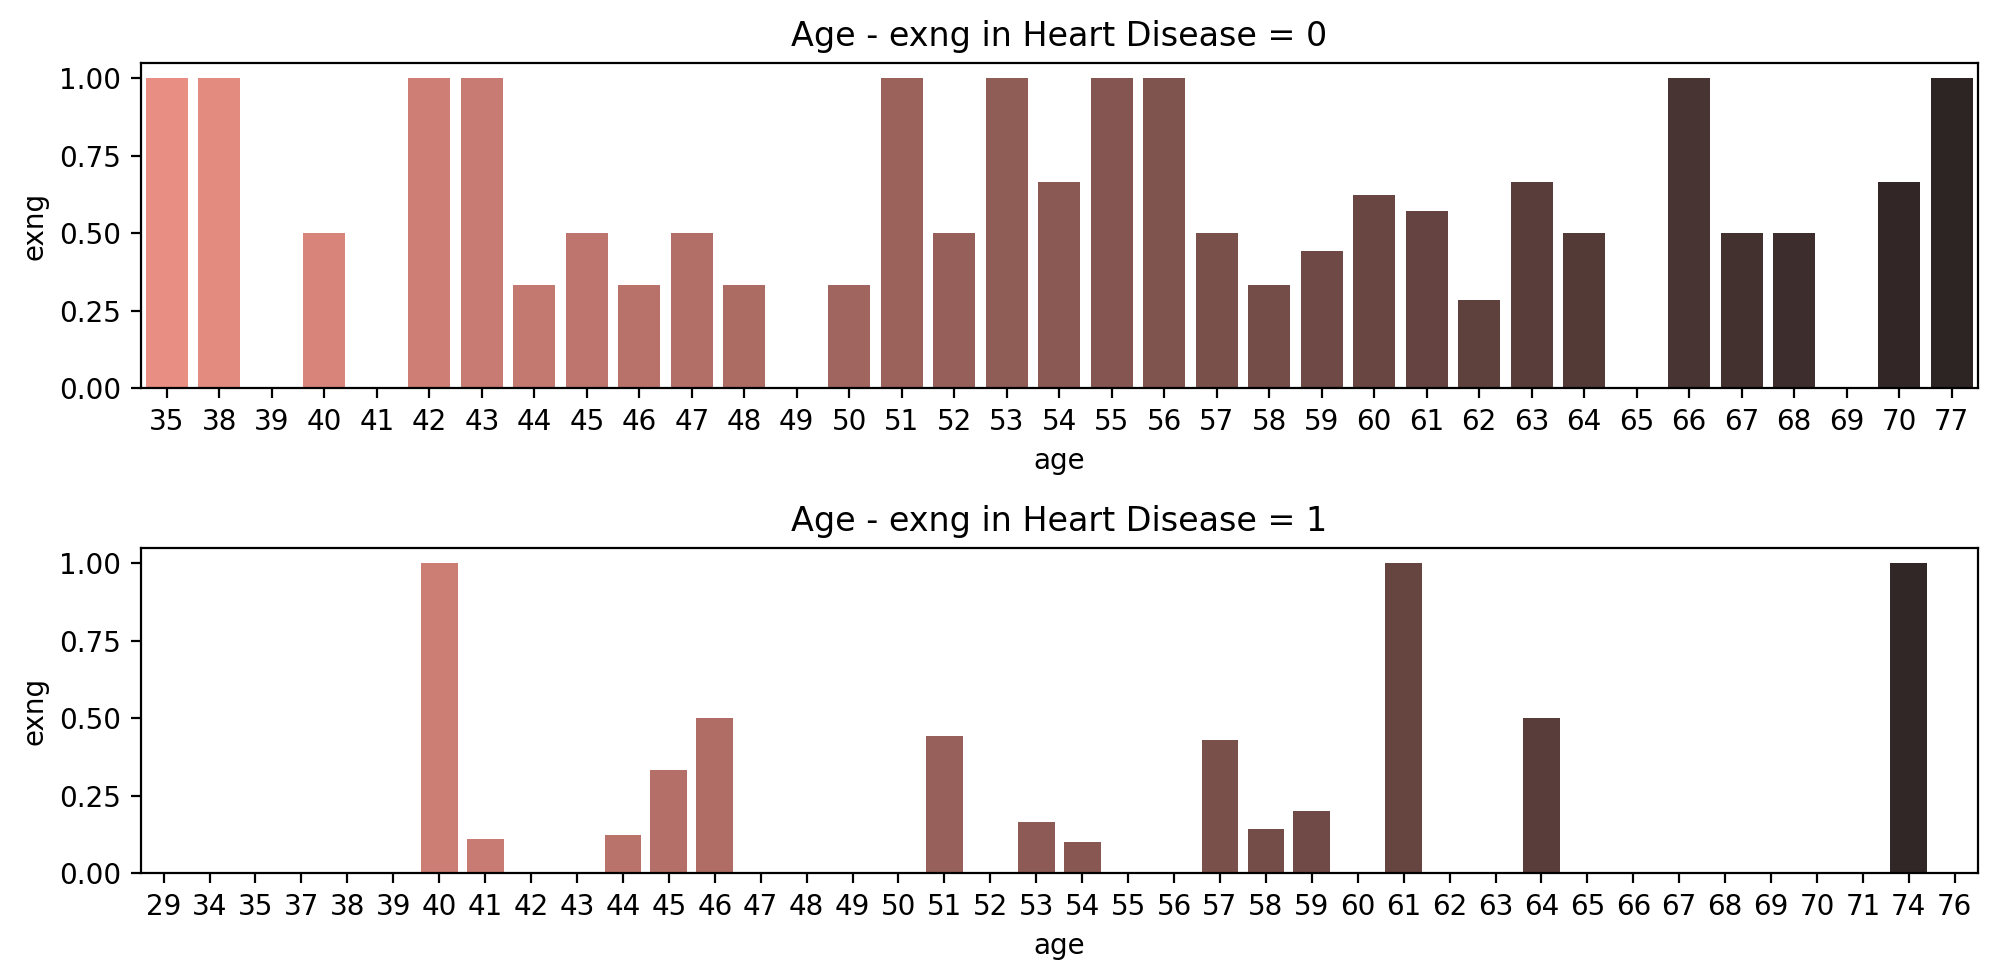

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5), dpi=200)
sns.barplot(x= Target_0_data['age'], y= Target_0_data['exng'], errorbar=None,
            palette="dark:salmon_r",ax= axes[0]).set(title='Age - exng in Heart Disease = 0')
sns.barplot(x= Target_1_data['age'], y= Target_1_data['exng'], errorbar=None,
            palette="dark:salmon_r",ax= axes[1]).set(title='Age - exng in Heart Disease = 1')


plt.tight_layout()

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5), dpi=200)
sns.barplot(x= Target_0_data['age'], y= Target_0_data['slp'], errorbar=None,
            palette="dark:salmon_r",ax= axes[0]).set(title='Age - slp in Heart Disease = 0')
sns.barplot(x= Target_1_data['age'], y= Target_1_data['slp'], errorbar=None,
            palette="dark:salmon_r",ax= axes[1]).set(title='Age - slp in Heart Disease = 1')


plt.tight_layout()

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5), dpi=200)
sns.barplot(x= Target_0_data['age'], y= Target_0_data['caa'], errorbar=None,
            palette="dark:salmon_r",ax= axes[0]).set(title='Age - caa in Heart Disease = 0')
sns.barplot(x= Target_1_data['age'], y= Target_1_data['caa'], errorbar=None,
            palette="dark:salmon_r",ax= axes[1]).set(title='Age - caa in Heart Disease = 1')


plt.tight_layout()

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5), dpi=200)
sns.barplot(x= Target_0_data['age'], y= Target_0_data['thall'], errorbar=None,
            palette="dark:salmon_r",ax= axes[0]).set(title='Age - thall in Heart Disease = 0')
sns.barplot(x= Target_1_data['age'], y= Target_1_data['thall'], errorbar=None,
            palette="dark:salmon_r",ax= axes[1]).set(title='Age - thall in Heart Disease = 1')


plt.tight_layout()

In [ ]:
plt.figure(figsize=(20,5), dpi=200)
plt.plot(Target_0_data['age'], Target_0_data['trtbps'], color= '#E72B3B')
plt.scatter(Target_1_data['age'], Target_1_data['trtbps'], color= 'black')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(["Without Disease","With Disease"], fontsize=15)

plt.title("Age - Resting blood pressure (in mm Hg)", fontsize=20)
plt.xlabel("Age", fontsize=15)
plt.ylabel("trtbps", fontsize=15)


plt.show()

In [ ]:
plt.figure(figsize=(20,5), dpi=200)
plt.plot(Target_0_data['age'], Target_0_data['chol'], color= '#E72B3B')
plt.scatter(Target_1_data['age'], Target_1_data['chol'], color= 'black')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(["Without Disease","With Disease"], fontsize=15)

plt.title("Age - Cholestoral in mg/dl fetched via BMI sensor", fontsize=20)
plt.xlabel("Age", fontsize=15)
plt.ylabel("chol", fontsize=15)
plt.show()


In [ ]:
plt.figure(figsize=(20,5), dpi=200)
plt.plot(Target_0_data['age'], Target_0_data['thalachh'], color= '#E72B3B')
plt.scatter(Target_1_data['age'], Target_1_data['thalachh'], color= 'black')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(["Without Disease","With Disease"], fontsize=15)

plt.title("Age - Maximum heart rate achieved", fontsize=20)
plt.xlabel("Age", fontsize=15)
plt.ylabel("thalachh", fontsize=15)


plt.show()

In [ ]:
plt.figure(figsize=(20,5), dpi=200)
plt.plot(Target_0_data['age'], Target_0_data['oldpeak'], color= '#E72B3B')
plt.scatter(Target_1_data['age'], Target_1_data['oldpeak'], color= 'black')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(["Without Disease","With Disease"], fontsize=15)

plt.title("Age - ST depression caused by activity in comparison to rest", fontsize=20)
plt.xlabel("Age", fontsize=15)
plt.ylabel("oldpeak", fontsize=15)


plt.show()

In [ ]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

background_color = "white"
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plot for various\n categorical features',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Sex count
ax1.text(0.3, 220, 'Sex', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=Main_Dataset,x='sex',palette="dark:salmon_r")
ax1.set_xlabel("")
ax1.set_ylabel("")

# Exng count
ax2.text(0.3, 220, 'Exng', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=Main_Dataset,x='exng',palette="dark:salmon_r")
ax2.set_xlabel("")
ax2.set_ylabel("")

# Caa count
ax3.text(1.5, 200, 'Caa', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=Main_Dataset,x='caa',palette="dark:salmon_r")
ax3.set_xlabel("")
ax3.set_ylabel("")

# Cp count
ax4.text(1.5, 162, 'Cp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=Main_Dataset,x='cp',palette="dark:salmon_r")
ax4.set_xlabel("")
ax4.set_ylabel("")

# Fbs count
ax5.text(0.5, 290, 'Fbs', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=Main_Dataset,x='fbs',palette="dark:salmon_r")
ax5.set_xlabel("")
ax5.set_ylabel("")

# Restecg count
ax6.text(0.75, 165, 'Restecg', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=Main_Dataset,x='restecg',palette="dark:salmon_r")
ax6.set_xlabel("")
ax6.set_ylabel("")

# Slp count
ax7.text(0.85, 155, 'Slp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=Main_Dataset,x='slp',palette="dark:salmon_r")
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thall count
ax8.text(1.2, 180, 'Thall', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=Main_Dataset,x='thall',palette="dark:salmon_r")
ax8.set_xlabel("")
ax8.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

In [ ]:
Features = Main_Dataset.drop(columns='output')
Features = pd.DataFrame(Features)

In [ ]:
scaler = MinMaxScaler()
Norm_data = scaler.fit_transform(Features)
Norm_df = pd.DataFrame(Norm_data, columns= Features.columns)

desc_norm_df = describe(Norm_df)
desc_norm_df = desc_norm_df.style.set_caption('Overview of the dataset').set_table_styles(Styles)
desc_norm_df.set_properties(**{'background-color': '#F6E7E8',
                           'color': 'black',
                           'border-color': 'black'})

In [ ]:
Norm_df.head(10).style.set_properties(**{'background-color': '#F6E7E8',
                           'color': 'black',
                           'border-color': 'black'})

In [ ]:
X = Norm_df#This dataframe is created for features
y = Main_Dataset['output'].values.reshape(-1,1)

In [ ]:
# Assuming X has the correct shape and y needs adjustment
y = Main_Dataset['output'].values.reshape(-1, 1)

# Check if y has one extra row
if y.shape[0] == X.shape[0] + 1:
    # Remove the last row of y
    y = y[:-1, :]

# Or, check if y is missing a row
elif y.shape[0] == X.shape[0] - 1:
    # Add a placeholder row (you might need to fill it with a suitable value)
    y = np.concatenate((y, np.array([[0]])), axis=0)  # Replace 0 with an appropriate value if needed

# Now, X and y should have the same number of samples
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

In [ ]:
# Check the shapes of your X and y arrays before splitting
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Investigate why they have different number of samples
# ... (Your code to identify the cause of the mismatch) ...

# After fixing the mismatch, proceed with the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [ ]:
training_acc_3 = []
test_acc_3 = []

C = [0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,
    26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]
#Kernel = {'linear', 'poly', 'rbf', 'sigmoid'}

for C_ in C:
    SVM = SVC(C= C_, kernel= 'linear')
    SVM.fit (X_train, y_train.ravel())
    training_acc_3.append(SVM.score(X_train,y_train))
    test_acc_3.append(SVM.score(X_test, y_test))


plt.figure(figsize=(15,5), dpi=200)
plt.plot(C, training_acc_3, label='Acc of training', color= 'black')
plt.plot(C, test_acc_3, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Number of C')
plt.title('Acc - Number of C, Linear')
plt.legend()
plt.xticks(range(0,50))
plt.annotate('Best C', xy=(20,0.86),xytext=(27.2,0.86), arrowprops=dict(facecolor='#E72B3B', shrink=0.05),fontsize=20)
plt.axvline(x = 20, linestyle= 'dotted', c= 'black')
plt.show()

In [ ]:
clf_3 = SVC(C= 20, kernel= 'linear')
clf_3.fit(X_train, y_train.ravel())
y_pred_3 = clf_3.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_3))
Best_SVM = metrics.accuracy_score(y_test,y_pred_3)

In [ ]:
conf_matrix_3 = confusion_matrix(y_test, y_pred_3)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (SVM , Linear , C = 20)")
annot = np.array([[f"{conf_matrix_3[0, 0]}", f"{conf_matrix_3[0, 1]}"],
                  [f"{conf_matrix_3[1, 0]}", f"{conf_matrix_3[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_3,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

In [ ]:
training_acc_4 = []
test_acc_4 = []

C = [0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,
    26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]
#Kernel = {'linear', 'poly', 'rbf', 'sigmoid'}

for C_ in C:
    SVM = SVC(C= C_, kernel= 'poly')
    SVM.fit (X_train, y_train.ravel())
    training_acc_4.append(SVM.score(X_train,y_train))
    test_acc_4.append(SVM.score(X_test, y_test))


plt.figure(figsize=(15,5), dpi=200)
plt.plot(C, training_acc_4, label='Acc of training', color= 'black')
plt.plot(C, test_acc_4, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Number of C ')
plt.title('Acc - Number of C - Poly')
plt.legend()
plt.xticks(range(0,50))
plt.annotate('Best C', xy=(2,0.9),xytext=(6.2,0.9), arrowprops=dict(facecolor='#E72B3B', shrink=0.05),fontsize=20)
plt.axvline(x = 2, linestyle= 'dotted', c= 'black')
plt.show()

In [ ]:
clf_4 = SVC(C= 2, kernel= 'poly')
clf_4.fit(X_train, y_train.ravel())
y_pred_4 = clf_4.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_4))

In [ ]:
conf_matrix_4 = confusion_matrix(y_test, y_pred_4)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (SVM , Poly , C = 2)")
annot = np.array([[f"{conf_matrix_4[0, 0]}", f"{conf_matrix_4[0, 1]}"],
                  [f"{conf_matrix_4[1, 0]}", f"{conf_matrix_4[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_4,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

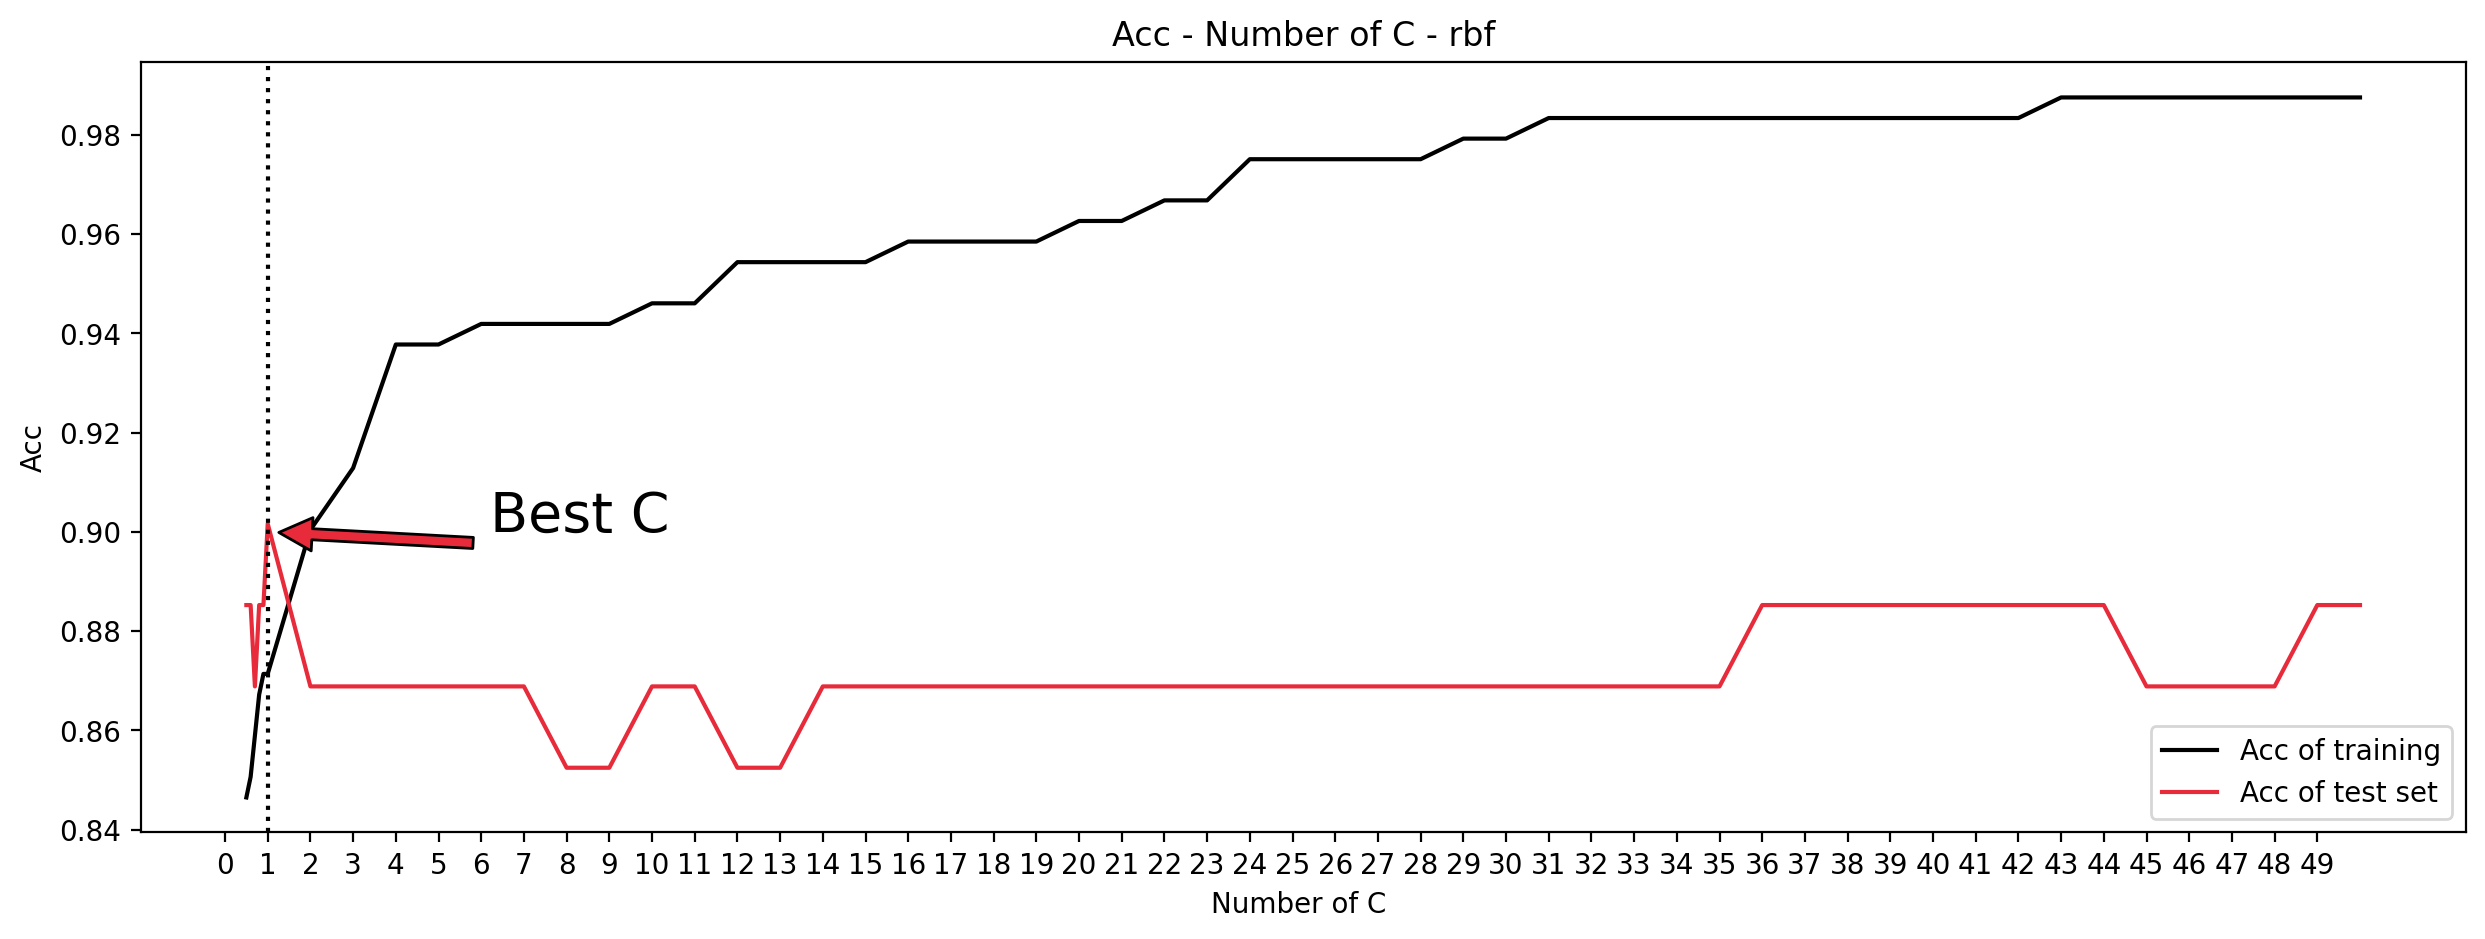

In [ ]:
training_acc_5 = []
test_acc_5 = []

C = [0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,
    26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]
#Kernel = {'linear', 'poly', 'rbf', 'sigmoid'}

for C_ in C:
    SVM = SVC(C= C_, kernel= 'rbf')
    SVM.fit (X_train, y_train.ravel())
    training_acc_5.append(SVM.score(X_train,y_train))
    test_acc_5.append(SVM.score(X_test, y_test))


plt.figure(figsize=(15,5), dpi=200)
plt.plot(C, training_acc_5, label='Acc of training', color= 'black')
plt.plot(C, test_acc_5, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Number of C ')
plt.title('Acc - Number of C - rbf')
plt.legend()
plt.xticks(range(0,50))
plt.annotate('Best C', xy=(1,0.9),xytext=(6.2,0.9), arrowprops=dict(facecolor='#E72B3B', shrink=0.05),fontsize=20)
plt.axvline(x = 1, linestyle= 'dotted', c= 'black')
plt.show()

In [ ]:
clf_5 = SVC(C= 1, kernel= 'rbf')
clf_5.fit(X_train, y_train.ravel())
y_pred_5 = clf_5.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_5))

Accuracy 0.9016393442622951


In [ ]:
conf_matrix_5 = confusion_matrix(y_test, y_pred_5)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (SVM , rbf , C = 1)")
annot = np.array([[f"{conf_matrix_5[0, 0]}", f"{conf_matrix_5[0, 1]}"],
                  [f"{conf_matrix_5[1, 0]}", f"{conf_matrix_5[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_5,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

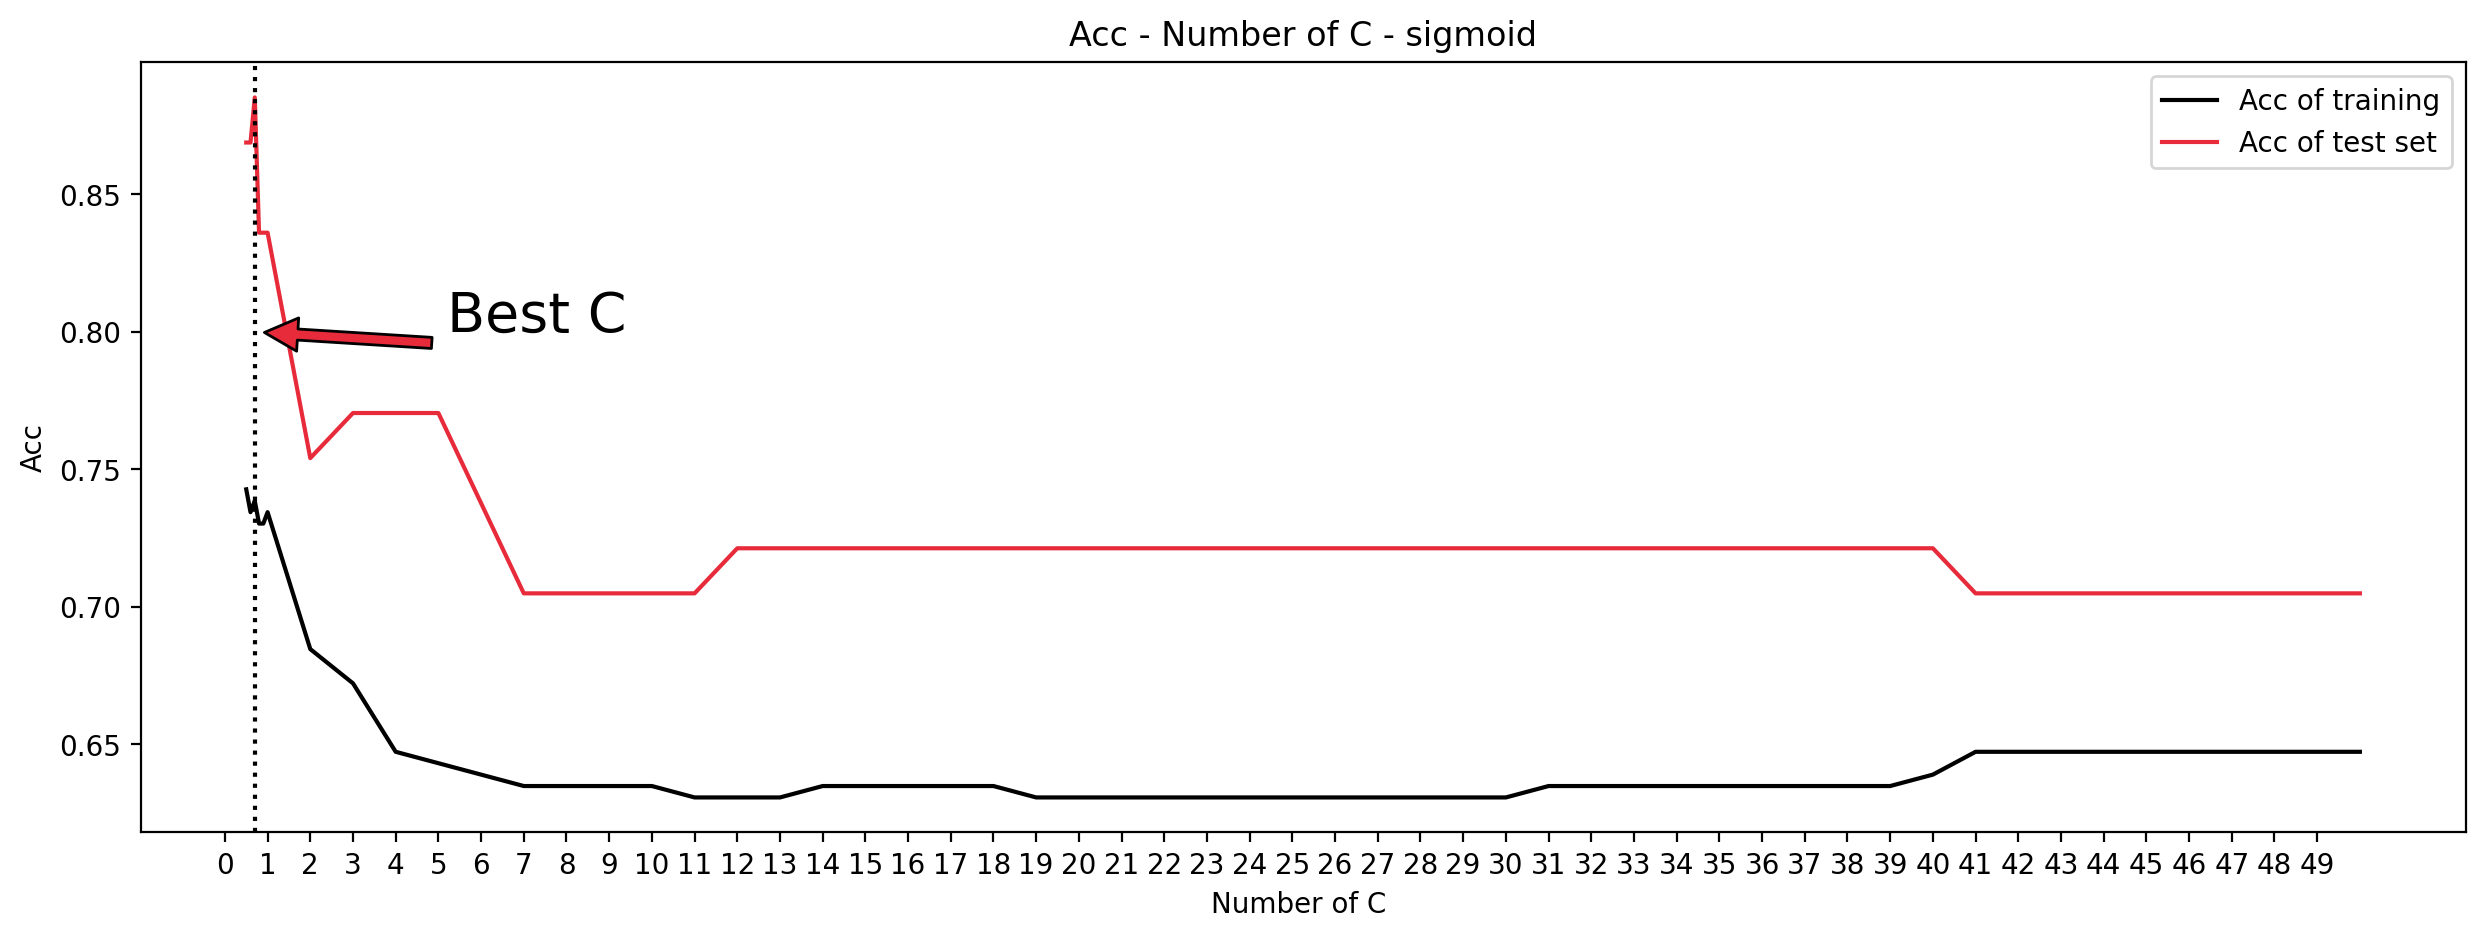

In [ ]:
training_acc_6 = []
test_acc_6 = []

C = [0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,
    26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]
#Kernel = {'linear', 'poly', 'rbf', 'sigmoid'}

for C_ in C:
    SVM = SVC(C= C_, kernel= 'sigmoid')
    SVM.fit (X_train, y_train.ravel())
    training_acc_6.append(SVM.score(X_train,y_train))
    test_acc_6.append(SVM.score(X_test, y_test))


plt.figure(figsize=(15,5), dpi=200)
plt.plot(C, training_acc_6, label='Acc of training', color= 'black')
plt.plot(C, test_acc_6, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Number of C ')
plt.title('Acc - Number of C - sigmoid')
plt.legend()
plt.xticks(range(0,50))
plt.annotate('Best C', xy=(0.7,0.8),xytext=(5.2,0.8), arrowprops=dict(facecolor='#E72B3B', shrink=0.05),fontsize=20)
plt.axvline(x =0.7, linestyle= 'dotted', c= 'black')
plt.show()

In [ ]:
clf_6 = SVC(C= 0.7, kernel= 'sigmoid')
clf_6.fit(X_train, y_train.ravel())
y_pred_6 = clf_6.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_6))

Accuracy 0.8852459016393442


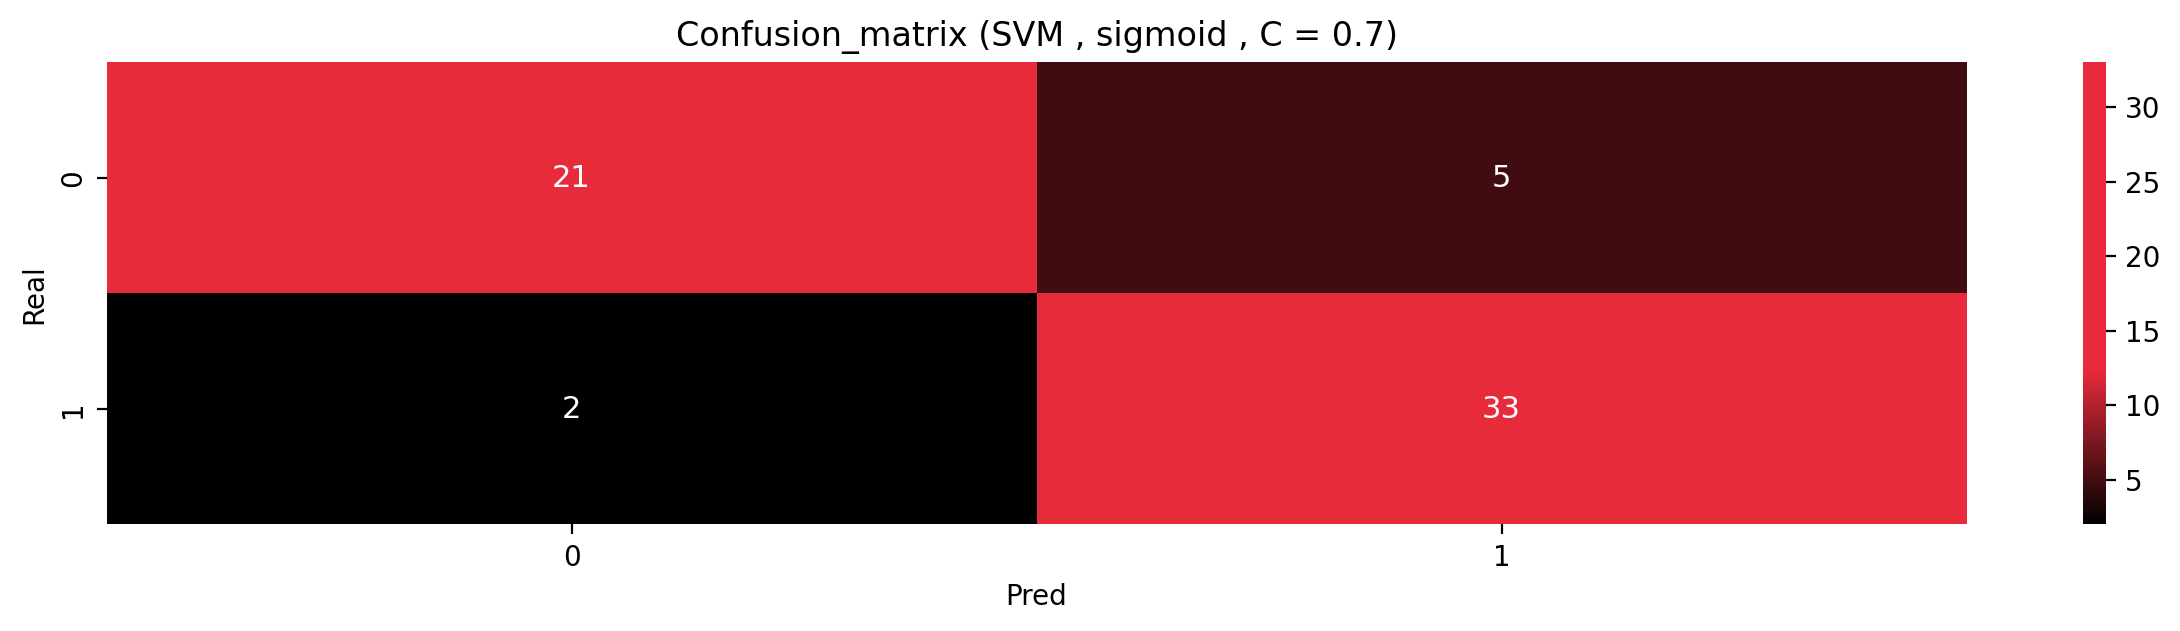

In [ ]:
conf_matrix_6 = confusion_matrix(y_test, y_pred_6)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (SVM , sigmoid , C = 0.7)")
annot = np.array([[f"{conf_matrix_6[0, 0]}", f"{conf_matrix_6[0, 1]}"],
                  [f"{conf_matrix_6[1, 0]}", f"{conf_matrix_6[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_6,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

In [3]:
print(Back.RED +color.BOLD+ "Classification report for clf_3 (Svm, kernel = Linear, C = 20):"+ Back.RESET+ color.END)
print(classification_report(y_train, clf_3.predict(X_train)))
print(Back.RED +color.BOLD +"Classification report for clf_4 (Svm, kernel = Poly, C = 2):"+ Back.RESET+ color.END)
print(classification_report(y_train, clf_4.predict(X_train)))
print(Back.RED +color.BOLD+ "Classification report for clf_5 (Svm, kernel = rbf, C = 1):"+ Back.RESET+ color.END)
print(classification_report(y_train, clf_5.predict(X_train)))
print(Back.RED +color.BOLD +"Classification report for clf_6 (Svm, kernel = Sigmoid, C = 0.7):"+ Back.RESET+ color.END)
print(classification_report(y_train, clf_6.predict(X_train)))

NameError: name 'Back' is not defined

In [6]:
!pip install Flask pyngrok scikit-learn pandas matplotlib seaborn colorama
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from flask import Flask, render_template, request, redirect, url_for
from pyngrok import ngrok
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [8]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from flask import Flask, render_template, request, redirect, url_for
from pyngrok import ngrok
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# Load and preprocess the dataset
Main_Dataset = pd.read_csv('/content/drive/MyDrive/pneumonia/heart (2).csv')
Features = Main_Dataset.drop(columns='output')
Features = pd.DataFrame(Features)

scaler = MinMaxScaler()
Norm_data = scaler.fit_transform(Features)
Norm_df = pd.DataFrame(Norm_data, columns=Features.columns)

X = Norm_df
y = Main_Dataset['output'].values.reshape(-1, 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM models
clf_3 = SVC(C=20, kernel='linear')
clf_3.fit(X_train, y_train.ravel())
clf_4 = SVC(C=2, kernel='poly')
clf_4.fit(X_train, y_train.ravel())
clf_5 = SVC(C=1, kernel='rbf')
clf_5.fit(X_train, y_train.ravel())
clf_6 = SVC(C=0.7, kernel='sigmoid')
clf_6.fit(X_train, y_train.ravel())


SVC(C=0.7, kernel='sigmoid')

In [4]:
!ngrok authtoken $your authtoken

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [11]:
# Create the Flask app
app = Flask(__name__)

@app.route('/')
def index():
    return '''
  <!DOCTYPE html>
<html>
<head>
    <title>Heart Disease Prediction</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            text-align: center;
            margin: 20px;
        }
        .form-container {
            max-width: 600px;
            margin: auto;
            display: flex;
            flex-wrap: wrap;
            justify-content: center;
        }
        .form-group {
            margin: 10px;
            flex: 1 1 30%;
            min-width: 200px;
        }
        .form-group label {
            display: block;
            margin-bottom: 5px;
        }
        .form-group input, .form-group select {
            width: 100%;
            padding: 8px;
            box-sizing: border-box;
        }
        .submit-button {
            margin: 20px;
            padding: 10px 20px;
            background-color: #4CAF50;
            color: white;
            border: none;
            cursor: pointer;
        }
        .submit-button:disabled {
            background-color: #ccc;
        }
    </style>
</head>
<body>
    <h1>Heart Disease Prediction Using Machine Learning</h1>
    <form id="predictionForm" action="/predict" method="post">
        <div class="form-container">
            <div class="form-group">
                <label for="age">Age:</label>
                <input type="number" id="age" name="age" step="0.01" required>
            </div>
            <div class="form-group">
                <label for="sex">Sex:</label>
                <input type="number" id="sex" name="sex" step="0.01" required>
            </div>
            <div class="form-group">
                <label for="cp">Chest Pain Type:</label>
                <input type="number" id="cp" name="cp" step="0.01" required>
            </div>
            <div class="form-group">
                <label for="trtbps">Resting Blood Pressure:</label>
                <input type="number" id="trtbps" name="trtbps" step="0.01" required>
            </div>
            <div class="form-group">
                <label for="chol">Cholesterol:</label>
                <input type="number" id="chol" name="chol" step="0.01" required>
            </div>
            <div class="form-group">
                <label for="fbs">Fasting Blood Sugar:</label>
                <input type="number" id="fbs" name="fbs" step="0.01" required>
            </div>
            <div class="form-group">
                <label for="rest_ecg">Resting Electrocardiographic Results:</label>
                <input type="number" id="rest_ecg" name="rest_ecg" step="0.01" required>
            </div>
            <div class="form-group">
                <label for="thalach">Maximum Heart Rate Achieved:</label>
                <input type="number" id="thalach" name="thalach" step="0.01" required>
            </div>
            <div class="form-group">
                <label for="exang">Exercise Induced Angina:</label>
                <input type="number" id="exang" name="exang" step="0.01" required>
            </div>
            <div class="form-group">
                <label for="oldpeak">ST Depression:</label>
                <input type="number" id="oldpeak" name="oldpeak" step="0.01" required>
            </div>
            <div class="form-group">
                <label for="slp">Slope of the Peak Exercise ST Segment:</label>
                <input type="number" id="slp" name="slp" step="0.01" required>
            </div>
            <div class="form-group">
                <label for="caa">Number of Major Vessels:</label>
                <input type="number" id="caa" name="caa" step="0.01" required>
            </div>
            <div class="form-group">
                <label for="thall">Thalassemia:</label>
                <input type="number" id="thall" name="thall" step="0.01" required>
            </div>
            <div class="form-group">
                <label for="model">Model:</label>
                <select id="model" name="model" required>
                    <option value="">Select a model</option>
                    <option value="linear">Linear</option>
                    <option value="poly">Polynomial</option>
                    <option value="rbf">RBF</option>
                    <option value="sigmoid">Sigmoid</option>
                </select>
            </div>
        </div>
        <input type="submit" value="Predict" class="submit-button">
    </form>

    <script>
        document.addEventListener('DOMContentLoaded', function() {
            const form = document.getElementById('predictionForm');
            const inputs = form.querySelectorAll('input, select');

            inputs.forEach((input, index) => {
                input.addEventListener('keydown', function(event) {
                    if (event.key === 'Enter') {
                        event.preventDefault();  // Prevent the form from submitting on Enter
                        const nextInput = inputs[index + 1];
                        if (nextInput) {
                            nextInput.focus();
                        }
                    }
                });
            });

            form.addEventListener('submit', function(event) {
                let isValid = true;
                inputs.forEach(input => {
                    if (input.value === '') {
                        isValid = false;
                        input.style.border = '1px solid red';
                    } else {
                        input.style.border = '';
                    }
                });

                if (!isValid) {
                    event.preventDefault();
                    alert('Please fill all fields before submitting.');
                }
            });
        });
    </script>
</body>
</html>


    '''

@app.route('/predict', methods=['POST'])
def predict():
    if request.method == 'POST':
        features = [float(request.form.get(f)) for f in request.form if f != 'model']
        features = np.array(features).reshape(1, -1)
        features = scaler.transform(features)  # Normalize features

        model_choice = request.form.get('model')
        if model_choice == 'linear':
            prediction = clf_3.predict(features)
        elif model_choice == 'poly':
            prediction = clf_4.predict(features)
        elif model_choice == 'rbf':
            prediction = clf_5.predict(features)
        elif model_choice == 'sigmoid':
            prediction = clf_6.predict(features)

        return f'''
        <!DOCTYPE html>
        <html>
        <head>
            <title>Prediction Result</title>
        </head>
        <body>
            <h1>Prediction Result</h1>
            <p>The model predicts: {prediction[0]}</p>
            <a href="/">Back to Home</a>
        </body>
        </html>
        '''

if __name__ == '__main__':
    # Open an ngrok tunnel to the HTTP server
    url = ngrok.connect(5000)
    print(' * Tunnel URL:', url)

    app.run(port=5000)


 * Tunnel URL: NgrokTunnel: "https://3f67-35-196-73-91.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [08/Aug/2024 01:06:24] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [08/Aug/2024 01:06:25] "GET /favicon.ico HTTP/1.1" 404 -
